In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
requests = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')
requests.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_50633/1764631690.py:1: DtypeWarning: Columns (10,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  requests = pd.read_csv('../data/hubNashville__311__Service_Requests.csv')


,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/04/2022 05:54:30 PM,05/04/2022 05:54:30 PM,Phone,NaN,NaN,...,False,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)"
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,04/01/2022 09:01:39 PM,04/05/2022 11:29:54 AM,Phone,NaN,NaN,...,False,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)"
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,04/01/2022 09:04:50 PM,04/06/2022 08:14:15 PM,Phone,NaN,NaN,...,False,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)"
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,04/01/2022 09:01:47 PM,04/01/2022 09:01:47 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,04/01/2022 09:03:10 PM,04/01/2022 10:04:31 PM,Phone,NaN,NaN,...,False,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)"


In [3]:
requests['Date / Time Opened'] = requests['Date / Time Opened'].astype('datetime64[ns]')
requests['Date / Time Closed'] = requests['Date / Time Closed'].astype('datetime64[ns]')

In [4]:
requests.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,False,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)"
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,False,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)"
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,False,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)"
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-04-01 21:01:47,2022-04-01 21:01:47,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,False,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)"


In [5]:
requests['Time to Resolve'] = requests['Date / Time Closed'] - requests['Date / Time Opened']
requests.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time to Resolve
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,NaN,True,1301 Pilgrim Dr,MADISON,8,37115.0,36.271880,-86.717549,"(36.2718801, -86.7175492)",0 days 00:00:00
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207.0,36.257270,-86.763690,"(36.25727, -86.76369)",3 days 14:28:15
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,NaN,False,3613 Wells Ct,ANTIOCH,33,37013.0,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-04-01 21:01:47,2022-04-01 21:01:47,Phone,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,NaN,False,401 Broadway,NASHVILLE,19,37203.0,36.160740,-86.777260,"(36.16074, -86.77726)",0 days 01:01:21


In [6]:
requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076715 entries, 0 to 1076714
Data columns (total 22 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   Request #                   1076715 non-null  int64          
 1   Status                      1076715 non-null  object         
 2   Request Type                1076287 non-null  object         
 3   Subrequest Type             1071402 non-null  object         
 4   Additional Subrequest Type  1026917 non-null  object         
 5   Date / Time Opened          1076715 non-null  datetime64[ns] 
 6   Date / Time Closed          1063766 non-null  datetime64[ns] 
 7   Request Origin              1076715 non-null  object         
 8   System of Origin ID         39480 non-null    object         
 9   Contact Type                29999 non-null    object         
 10  Preferred Language          1 non-null        object         
 11  State Issue

In [7]:
requests_df = requests[requests.ZIP != 'TN']
requests_df = requests_df.dropna(subset = ['ZIP'])
requests_df['ZIP'] = requests_df['ZIP'].astype(int)
requests_df

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time to Resolve
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,NaN,True,1301 Pilgrim Dr,MADISON,8,37115,36.271880,-86.717549,"(36.2718801, -86.7175492)",0 days 00:00:00
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,NaN,False,1237 Tuckahoe Dr,NASHVILLE,3,37207,36.257270,-86.763690,"(36.25727, -86.76369)",3 days 14:28:15
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,NaN,False,3613 Wells Ct,ANTIOCH,33,37013,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,NaN,False,401 Broadway,NASHVILLE,19,37203,36.160740,-86.777260,"(36.16074, -86.77726)",0 days 01:01:21
6,932943,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:08:39,2022-04-01 23:49:34,Phone,NaN,NaN,...,NaN,False,1005 Hickory Hill Ln,HERMITAGE,14,37076,36.189786,-86.631410,"(36.1897858, -86.6314104)",0 days 02:40:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076710,525002,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-16 16:19:54,2022-11-03 16:36:08,hubNashville Community,NaN,NaN,...,NaN,False,1728 Nubell St,NASHVILLE,2,37208,36.188885,-86.813695,"(36.1888853116179, -86.81369450000001)",687 days 00:16:14
1076711,523996,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-15 14:37:37,2022-11-03 16:36:08,Phone,NaN,NaN,...,NaN,False,2603 West End Ave,NASHVILLE,18,37203,36.145660,-86.810011,"(36.14566, -86.8100105)",688 days 01:58:31
1076712,522868,Closed,"Trash, Recycling & Litter",Illegal Dumping,Roadway,2020-12-14 01:53:25,2022-11-28 16:49:10,hubNashville Community,NaN,NaN,...,NaN,False,John Hagar Rd & Regatta Blvd,HERMITAGE,12,37076,36.154550,-86.587390,"(36.1545500234489, -86.58738988758411)",714 days 14:55:45
1076713,521163,Closed,"Streets, Roads & Sidewalks",Damaged Sign,Damaged Sign,2020-12-10 16:55:14,2022-11-03 18:47:04,Mobile App,NaN,NaN,...,NaN,False,4606 Charlotte Pike,NASHVILLE,24,37209,36.152191,-86.842668,"(36.15219084106823, -86.84266816824675)",693 days 01:51:50


In [8]:
requests_df['Hours to Resolve'] = requests_df['Time to Resolve'] / pd.Timedelta(hours=1)
requests_df['Days to Resolve'] = requests_df['Time to Resolve'] / pd.Timedelta(hours=1) / 24
requests_df

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,1301 Pilgrim Dr,MADISON,8,37115,36.271880,-86.717549,"(36.2718801, -86.7175492)",0 days 00:00:00,0.000000,0.000000
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,1237 Tuckahoe Dr,NASHVILLE,3,37207,36.257270,-86.763690,"(36.25727, -86.76369)",3 days 14:28:15,86.470833,3.602951
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,3613 Wells Ct,ANTIOCH,33,37013,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,401 Broadway,NASHVILLE,19,37203,36.160740,-86.777260,"(36.16074, -86.77726)",0 days 01:01:21,1.022500,0.042604
6,932943,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:08:39,2022-04-01 23:49:34,Phone,NaN,NaN,...,1005 Hickory Hill Ln,HERMITAGE,14,37076,36.189786,-86.631410,"(36.1897858, -86.6314104)",0 days 02:40:55,2.681944,0.111748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076710,525002,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-16 16:19:54,2022-11-03 16:36:08,hubNashville Community,NaN,NaN,...,1728 Nubell St,NASHVILLE,2,37208,36.188885,-86.813695,"(36.1888853116179, -86.81369450000001)",687 days 00:16:14,16488.270556,687.011273
1076711,523996,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-15 14:37:37,2022-11-03 16:36:08,Phone,NaN,NaN,...,2603 West End Ave,NASHVILLE,18,37203,36.145660,-86.810011,"(36.14566, -86.8100105)",688 days 01:58:31,16513.975278,688.082303
1076712,522868,Closed,"Trash, Recycling & Litter",Illegal Dumping,Roadway,2020-12-14 01:53:25,2022-11-28 16:49:10,hubNashville Community,NaN,NaN,...,John Hagar Rd & Regatta Blvd,HERMITAGE,12,37076,36.154550,-86.587390,"(36.1545500234489, -86.58738988758411)",714 days 14:55:45,17150.929167,714.622049
1076713,521163,Closed,"Streets, Roads & Sidewalks",Damaged Sign,Damaged Sign,2020-12-10 16:55:14,2022-11-03 18:47:04,Mobile App,NaN,NaN,...,4606 Charlotte Pike,NASHVILLE,24,37209,36.152191,-86.842668,"(36.15219084106823, -86.84266816824675)",693 days 01:51:50,16633.863889,693.077662


In [19]:
requests_clean = requests_df[requests.ZIP != 0]
requests_clean = requests_df[requests.ZIP != 372515]

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_50633/2063316625.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  requests_clean = requests_df[requests.ZIP != 0]
/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_50633/2063316625.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  requests_clean = requests_df[requests.ZIP != 372515]


In [20]:
print(requests_clean['ZIP'].value_counts().to_string())

37013    68662
37211    65905
37209    59194
37207    50040
37206    48384
37208    40019
37203    35983
37115    35596
37214    32954
37205    30777
37217    29445
37215    27150
37216    26786
37210    25809
37212    20749
37204    20628
37218    20541
37076    15676
37221    12339
37219    11753
37027     8339
37201     7515
37138     7457
37220     6579
37072     5084
37189     3506
37213     2498
37080     2163
37228     1292
37135      484
37086      396
37015      345
37143      247
37122      229
37240       63
37064       60
37246       60
0           57
37232       37
37238        9
37075        5
37090        2
37152        2
37172        2
37066        2
37160        2
37073        2
37130        1
37067        1
37663        1
37040        1
38401        1
37087        1
37129        1
38506        1
37363        1
37036        1
14210        1
38011        1
37243        1


In [21]:
requests_clean

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04 17:54:30,2022-05-04 17:54:30,Phone,NaN,NaN,...,1301 Pilgrim Dr,MADISON,8,37115,36.271880,-86.717549,"(36.2718801, -86.7175492)",0 days 00:00:00,0.000000,0.000000
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01 21:01:39,2022-04-05 11:29:54,Phone,NaN,NaN,...,1237 Tuckahoe Dr,NASHVILLE,3,37207,36.257270,-86.763690,"(36.25727, -86.76369)",3 days 14:28:15,86.470833,3.602951
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01 21:04:50,2022-04-06 20:14:15,Phone,NaN,NaN,...,3613 Wells Ct,ANTIOCH,33,37013,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:03:10,2022-04-01 22:04:31,Phone,NaN,NaN,...,401 Broadway,NASHVILLE,19,37203,36.160740,-86.777260,"(36.16074, -86.77726)",0 days 01:01:21,1.022500,0.042604
6,932943,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01 21:08:39,2022-04-01 23:49:34,Phone,NaN,NaN,...,1005 Hickory Hill Ln,HERMITAGE,14,37076,36.189786,-86.631410,"(36.1897858, -86.6314104)",0 days 02:40:55,2.681944,0.111748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076710,525002,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-16 16:19:54,2022-11-03 16:36:08,hubNashville Community,NaN,NaN,...,1728 Nubell St,NASHVILLE,2,37208,36.188885,-86.813695,"(36.1888853116179, -86.81369450000001)",687 days 00:16:14,16488.270556,687.011273
1076711,523996,Closed,"Streets, Roads & Sidewalks",Potholes,Roadway,2020-12-15 14:37:37,2022-11-03 16:36:08,Phone,NaN,NaN,...,2603 West End Ave,NASHVILLE,18,37203,36.145660,-86.810011,"(36.14566, -86.8100105)",688 days 01:58:31,16513.975278,688.082303
1076712,522868,Closed,"Trash, Recycling & Litter",Illegal Dumping,Roadway,2020-12-14 01:53:25,2022-11-28 16:49:10,hubNashville Community,NaN,NaN,...,John Hagar Rd & Regatta Blvd,HERMITAGE,12,37076,36.154550,-86.587390,"(36.1545500234489, -86.58738988758411)",714 days 14:55:45,17150.929167,714.622049
1076713,521163,Closed,"Streets, Roads & Sidewalks",Damaged Sign,Damaged Sign,2020-12-10 16:55:14,2022-11-03 18:47:04,Mobile App,NaN,NaN,...,4606 Charlotte Pike,NASHVILLE,24,37209,36.152191,-86.842668,"(36.15219084106823, -86.84266816824675)",693 days 01:51:50,16633.863889,693.077662


In [10]:
def zip(requests):
    return requests_df['Days to Resolve'].mean()
zip_time_plot = requests_df.groupby(['ZIP']).apply(zip)
zip_time_plot = zip_time_plot.reset_index()

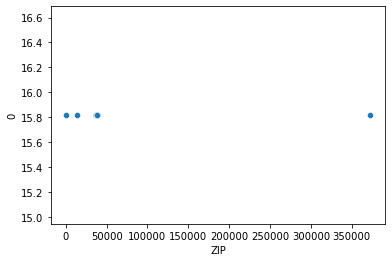

In [11]:
sns.scatterplot(x = 'ZIP', y = 0, data = zip_time_plot);

In [12]:
# zip_time_plot['ZIP'] = pd.to_numeric(zip_time_plot['ZIP'])
# zip_time_plot.info()